## Steps used to build this model:
##### 1) Loading the dataset.
##### 2) Checking the category of all the variables and then changing it accordingly.
##### 3) Checking the outliers and then fixing it with the capping method.
##### 4) Dropping unnecessary columns.
##### 5) Analyzing the correlation matrix and then removing the multicolinear variables if any.
##### 6) Perfoming EDA and finding interesting facts.
##### 7) Using Train Test Split function on the dataset.
##### 8) Applying the logistic regression model and fetching the Logit Regression Results.
##### 9) Plotting the confusion matrix and fetching the accuracy.
##### 10) Using Backward elemination and then removing unwanted columns and fetching the highest accuracy.

## IMPORTING REQUIRED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score
from sklearn import metrics
%matplotlib inline

## IMPORTING THE DATASET

In [2]:
data = pd.read_csv(r'C:/docs/Predictive/Poornima/Bank-Loan-Prediction-master\Bank_Personal_Loan_Modelling.csv)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### DATA DESCRIPTION
#ID:Customer ID
#Age:Customer's age in completed years
#Experience:years of professional experience
#Income:Annual income of the customer
#ZIPCode:Home Address ZIP code
#Family:Family size of the customer
#CCAvg:Avg. spending on credit cards per month
#Education:Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#Mortgage:Value of house mortgage if any.
#Personal Loan:Did this customer accept the personal loan offered in the last campaign
#Securities Account:Does the customer have a securities account with the bank
#CD Account:Does the customer have a certificate of deposit (CD) account with the bank
#Online:Does the customer use internet banking facilities
#CreditCard:Does the customer use a credit card issued by UniversalBank

## FETCHING THE STATS OF THE DATASET

In [3]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### CHECKING THE DATATYPES AND THE COUNT OF THE NUMBER OF COLUMNS AND ROWS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### CONVERTING THE REQUIRED COLUMNS INTO CATEGORY

In [5]:
# Converting coluumns into categories
# Family 
print(data['Family'].value_counts())

# Education - Education level of the customer 
print(data['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


In [6]:
data['Education'] = data['Education'].astype('category')
data['Family'] = data['Family'].astype('category')
data['ZIP Code'] = data['ZIP Code'].astype('category')
data['ID'] = data['ID'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   category
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   int64   
 11  CD Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(4), float64(1), int64(9)
memory usage: 643.0 KB


### CHECKING IF ANY DUPLICATES ARE PRESENT AND THEN DROPPING THEM

In [7]:
#Each row has a unique value for ID
data.ID.drop_duplicates().count()

5000

In [8]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### DROPPING UNNECESSARY COLUMNS

In [9]:
data.drop(['ID'], axis = 1, inplace = True)

In [10]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### FETCHING THE SUM OF NULL VALUES IN THE DATASET

In [11]:
# No columns have null data in the file
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### EXPERIENCE COLUMN HAS FEW NEGATIVE VARIABLES WHICH WE ARE REPLAING IT WITH MEDIAN VALUES

In [12]:
#Counting Negaive experience
data[data['Experience'] < 0]['Experience'].count()

52

In [13]:
# Creating a list of ages.
ages = data[data['Experience'] < 0]['Age'].unique().tolist()

# Creating a list of indexes.
indexes = data[data['Experience'] < 0].index.tolist()

# Replacing Negative Value with median.
for i in indexes:
    for x in ages:
        data.loc[i,'Experience'] = data[(data.Age == x) & (data.Experience > 0)].Experience.median()

#### THE EXPERIENCE COLUMN NOW HAS NO NEGATIVE VALUES

In [14]:
data[data['Experience'] < 0]['Experience'].count()

0

### SPLITTING THE DATASET TYPES BY CATEGORICAL AND CONTINUOUS VALUES

In [15]:
#Splitting the data into Continuous and Categorial values assuming that categorical values have <10 unique values
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print(categorical_val)
print(continous_val)

Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience : [ 1. 19. 15.  9.  8. 13. 27. 24. 10. 39.  5. 23. 32. 41. 30. 14. 18. 21.
 28. 31. 11. 16. 20. 35.  6. 25.  7. 12. 26. 37. 17.  2. 36. 29.  3. 22.
 34.  0. 38. 40. 33.  4. 42. 43.]
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 2

In [16]:
print(continous_val)

['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


### NO OUTLIERS CALCULATION FOR BINARY COLUMNS

In [17]:
data["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [18]:
data["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [20]:
data["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

### CHECKING OUTLIERS FOR CONTINUOUS VARIABLES

Age              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Experience    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Income        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
CCAvg            AxesSubplot(0.125,0.391471;0.227941x0.222059)
Mortgage      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

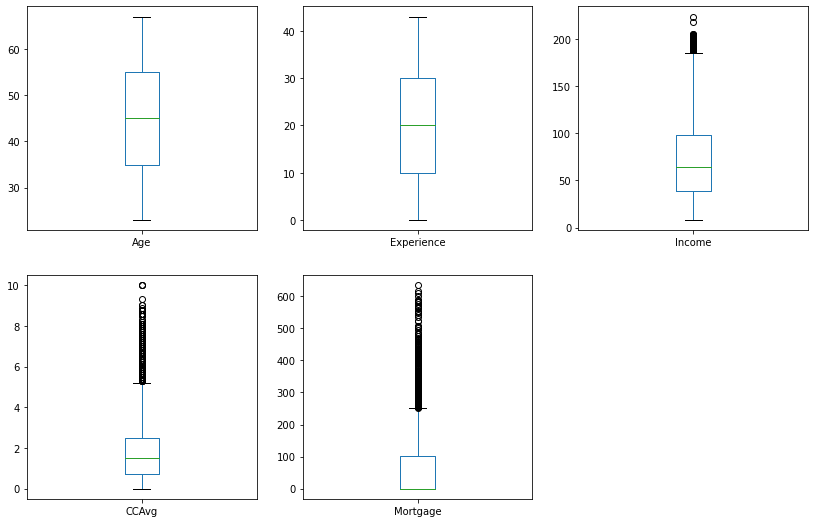

In [21]:
#Checking outliers for continous columns and replacing them
data[continous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

### FIXING THE OUTLIERS BY APPLYING CAPPING METHOD ON THEM

In [22]:
Outlier = ['Income', 'CCAvg', 'Mortgage']
Q1=data[Outlier].quantile(0.25)
Q3=data[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i]

<ipython-input-22-9400e5322d21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i]
<ipython-input-22-9400e5322d21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i]
<ipython-input-22-9400e5322d21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i]
<ipython-input-22-9400

### CHECKING THE OUTLIERS AFTER APPLYING CAPPING METHOD

Age              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Experience    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Income        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
CCAvg            AxesSubplot(0.125,0.391471;0.227941x0.222059)
Mortgage      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

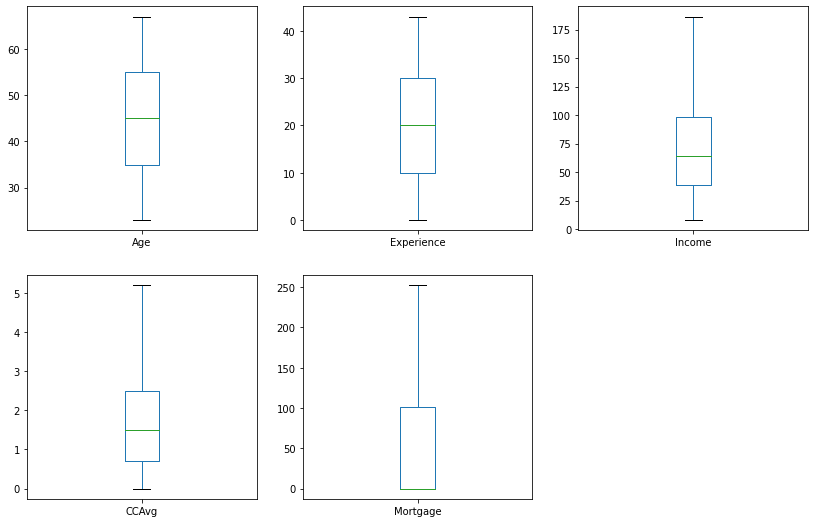

In [23]:
#Checking outliers for continous columns and replacing them
data[continous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

### CHECKING MULTICOLINEARITY AND THEN DROPPING THE EXPERIENCE COLUMN BECAUSE IT IS HIGHLY COLINEAR WITH AGE COLUMN

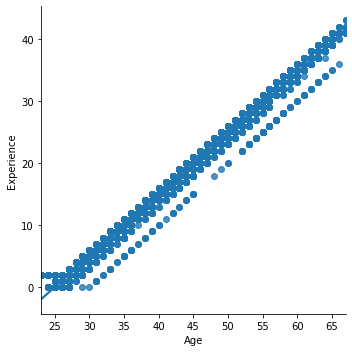

In [24]:
sns.lmplot(x="Age", y = "Experience", data = data)  #as age and experience is linearly related, drop experience

In [25]:
data.drop(['Experience'], axis = 1, inplace = True)

In [26]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,45,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,39,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,35,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,35,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


### PLOTTING GRAPHS FOR CATEGORICAL VARIABLES

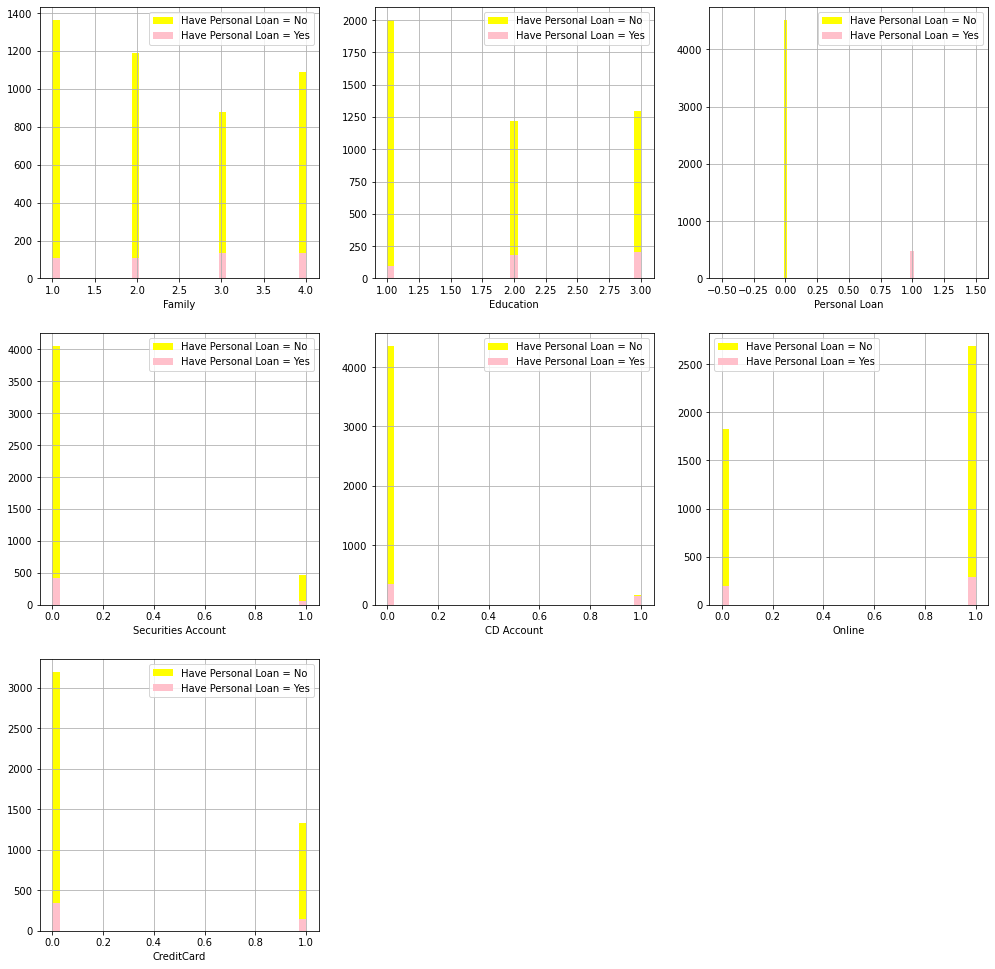

In [27]:
plt.figure(figsize=(17,17))
for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    data[data["Personal Loan"]==0][column].hist(bins=35,color='yellow',label='Have Personal Loan = No')
    data[data["Personal Loan"]==1][column].hist(bins=35,color='pink',label="Have Personal Loan = Yes")
    plt.legend()
    plt.xlabel(column)

## EDA

### CORRELATION MATRIX

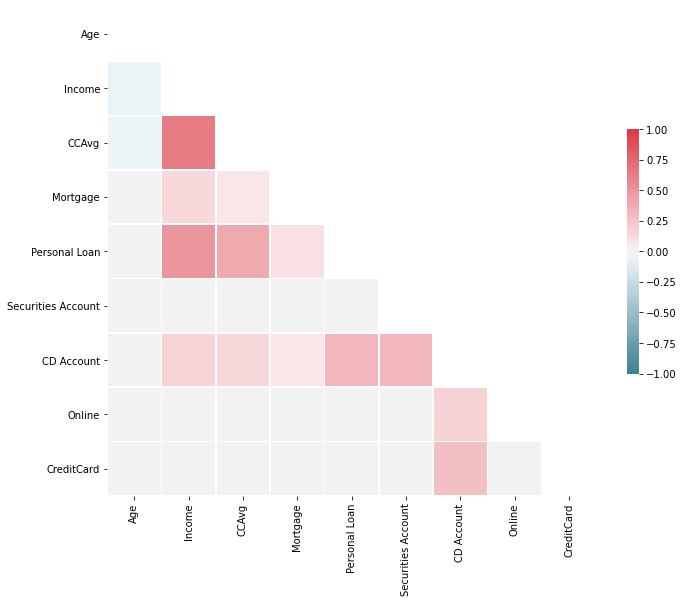

In [28]:
cor = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### DISTRIBUTION PLOT FOR MORTGAGE AND EDUCATION

Text(0.5, 1.0, 'Mortgage Distribution')

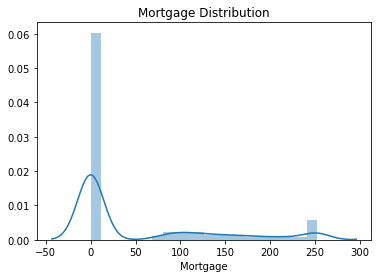

In [29]:
sns.distplot(data["Mortgage"])
plt.title("Mortgage Distribution")

Text(0.5, 1.0, 'Distribution of Education')

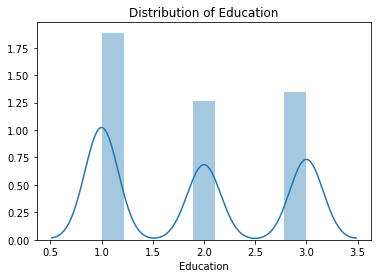

In [30]:
sns.distplot(data['Education'])
plt.title("Distribution of Education")

### PIE PLOT FOR FAMILY WITH RESPECT TO DIFFERENT FAMILY TYPES

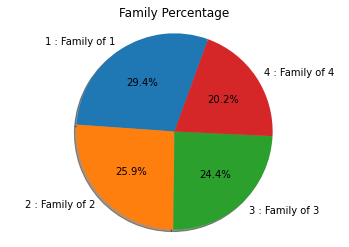

In [31]:
fig1, ax1 = plt.subplots()

ax1.pie(data["Family"].value_counts(), labels=["1 : Family of 1", "2 : Family of 2", "3 : Family of 3", "4 : Family of 4"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Family Percentage")
plt.show()

### DISTRIBUTION PLOT FOR AGE WITH RESPECT TO LOAN TAKEN OR NOT

Text(0.5, 1.0, 'Age Distribution')

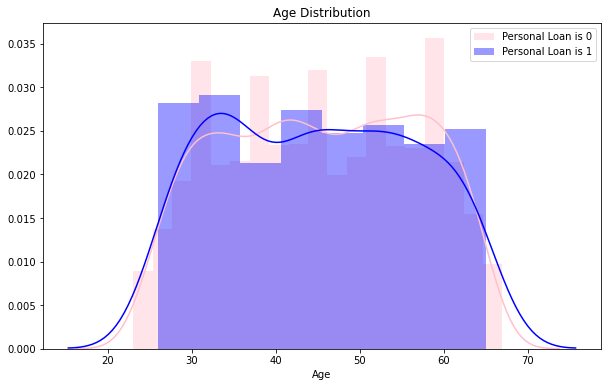

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(data[data["Personal Loan"] == 0]['Age'], color = 'pink',label='Personal Loan is 0',kde=True)
sns.distplot(data[data["Personal Loan"] == 1]['Age'], color = 'blue',label='Personal Loan is 1',kde=True)
plt.legend()
plt.title("Age Distribution")

## APPLYING TRAIN TEST SPLIT

In [33]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
y_log=data[['Personal Loan']]
x_log=data.drop(['Personal Loan'],axis=1)
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(x_log,y_log,test_size=0.2)

## FITTING THE LOGIT MODEL AND THE FETCHING THE SUMMARY

In [34]:
logit_model=sm.Logit(y_train_log,x_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.128189
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3989
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 Nov 2020   Pseudo R-squ.:                  0.5974
Time:                        09:37:43   Log-Likelihood:                -512.76
converged:                       True   LL-Null:                       -1273.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0051      0.007      0.698      0.485      -0.009       0.019
Incom

## GETTING THE CONFUSION MATRIX

In [35]:
logistic_regression= LogisticRegression()
logistic_regression.fit(x_train_log,y_train_log)
confusion_matrix(y_train_log, logistic_regression.predict(x_train_log))

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[3495,  117],
       [ 262,  126]], dtype=int64)

### CALCULATING THE ACCURACY SCORE

In [36]:
test_score_lm1 = accuracy_score(y_test_log, logistic_regression.predict(x_test_log)) * 100
test_score_lm1

91.8

### CREATING DUMMY VARIABLES

In [37]:
data1 = pd.get_dummies(data, columns=['Education'])

In [38]:
data1.rename(columns={"Education_1": "Edu_Undergrad", "Education_2": "Edu_Grad","Education_3": "Edu_Advance" },inplace = True)

In [39]:
data1.head()

,Age,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_Undergrad,Edu_Grad,Edu_Advance
0,25,49.0,91107,4,1.6,0.0,0,1,0,0,0,1,0,0
1,45,34.0,90089,3,1.5,0.0,0,1,0,0,0,1,0,0
2,39,11.0,94720,1,1.0,0.0,0,0,0,0,0,1,0,0
3,35,100.0,94112,1,2.7,0.0,0,0,0,0,0,0,1,0
4,35,45.0,91330,4,1.0,0.0,0,0,0,0,1,0,1,0


### CHECKING UNBALANCED TARGET VARIBALE AND FIXING IT WITH OVER SAMPLING APPROACH

### PERSONAL LOAN COLUMN BEFORE OVERSAMPLING

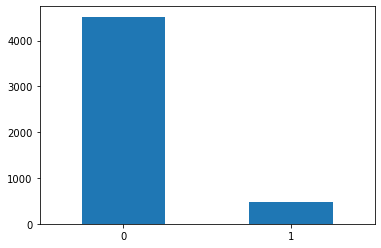

In [40]:
count_classes = pd.value_counts(data1['Personal Loan'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

In [41]:
# Class count
count_class_0, count_class_1 = data1['Personal Loan'].value_counts()

# Divide by class
df_class_0 = data1[data1['Personal Loan'] == 0]
df_class_1 = data1[data1['Personal Loan'] == 1]

### APPLYING OVERSAMPLING ON THE DATASET

In [42]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['Personal Loan'].value_counts())

Random over-sampling:
1    4520
0    4520
Name: Personal Loan, dtype: int64


### PERSONAL LOAN COLUMN AFTER OVERSAMPLING

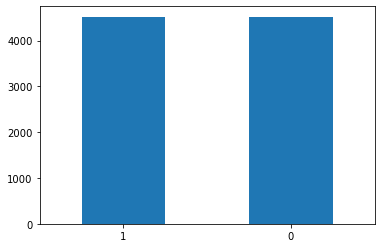

In [43]:
count_classes = pd.value_counts(df_test_over['Personal Loan'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

### APPLYING TRAIN TEST SPLIT

In [44]:
#Train test split
y=df_test_over[['Personal Loan']]
x=df_test_over.drop(['Personal Loan'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### IMPORTING NECESSARY LIBRARIES

In [45]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import time

### APPLYING RANDOM FOREST CLASSIFIER 

In [64]:
#test out different estimators to see how model improves, test out 100,200,500
print("For n = 100")
rfclass=RandomForestClassifier(n_estimators=100,random_state=0) 
start = time.time()
rfclass.fit(X_train,y_train)
stop = time.time()
rfypred=rfclass.predict(X_test)
print(accuracy_score(y_test,rfypred))
rfclass.score(X_test, y_test)
print(f"Training time: {stop - start}s")

For n = 100


<ipython-input-64-4d69380bb835>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclass.fit(X_train,y_train)


0.9950221238938053
Training time: 0.38996315002441406s


In [65]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

<ipython-input-65-769def312097>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


AUC: 1.00


In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

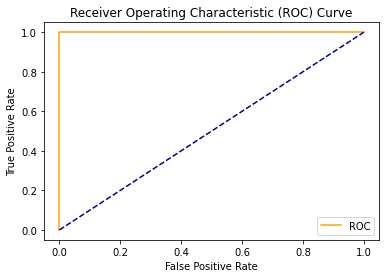

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

For n = 200


<ipython-input-68-c7e4c39600f1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclass.fit(X_train,y_train)


0.995575221238938
Training time: 0.7330799102783203s


<ipython-input-68-c7e4c39600f1>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


AUC: 1.00


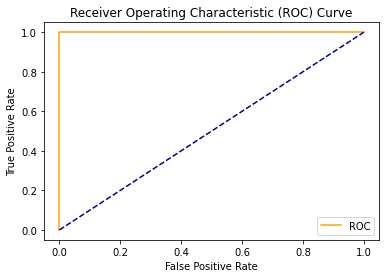

In [68]:
#test out different estimators to see how model improves, test out 100,200,500
print("For n = 200")
rfclass=RandomForestClassifier(n_estimators=200,random_state=0) 
start = time.time()
rfclass.fit(X_train,y_train)
stop = time.time()
rfypred=rfclass.predict(X_test)
print(accuracy_score(y_test,rfypred))
rfclass.score(X_test, y_test)
print(f"Training time: {stop - start}s")

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

For n = 500


<ipython-input-69-6747178f1134>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclass.fit(X_train,y_train)


0.9988938053097345
Training time: 1.913137435913086s


<ipython-input-69-6747178f1134>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


AUC: 1.00


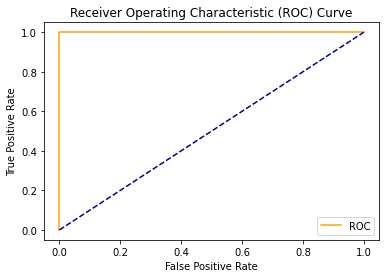

In [69]:
#test out different estimators to see how model improves, test out 100,200,500
print("For n = 500")
rfclass=RandomForestClassifier(n_estimators=500,random_state=0) 
start = time.time()
rfclass.fit(X_train,y_train)
stop = time.time()
rfypred=rfclass.predict(X_test)
print(accuracy_score(y_test,rfypred))
rfclass.score(X_test, y_test)
print(f"Training time: {stop - start}s")

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### APPLYING GRADIENT BOOSTING CLASSIFIER

In [58]:
#test out different estimators to see how model improves, test out 100,200,500
print("For n = 100")
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100)
start = time.time()
gbclass.fit(X_train,y_train)
stop = time.time()
gbypred=gbclass.predict(X_test)
print(accuracy_score(y_test,gbypred))
gbclass.score(X_test, y_test)
print(f"Training time: {stop - start}s")

For n = 100


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9911504424778761
Training time: 0.6552872657775879s


In [62]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AUC: 1.00


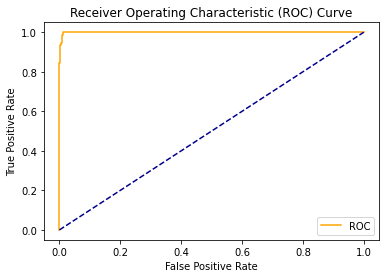

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

For n = 200


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9983407079646017
Training time: 1.327451229095459s


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AUC: 1.00


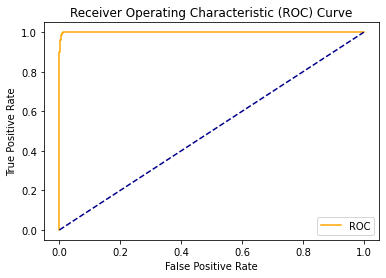

In [70]:
#test out different estimators to see how model improves, test out 100,200,500
print("For n = 200")
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=200)
start = time.time()
gbclass.fit(X_train,y_train)
stop = time.time()
gbypred=gbclass.predict(X_test)
print(accuracy_score(y_test,gbypred))
gbclass.score(X_test, y_test)
print(f"Training time: {stop - start}s")

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

For n = 500


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9988938053097345
Training time: 3.281675338745117s


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AUC: 1.00


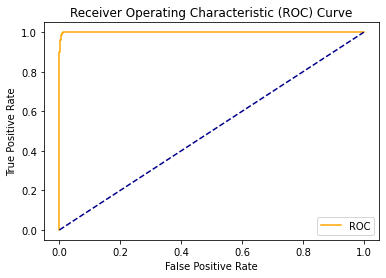

In [71]:
#test out different estimators to see how model improves, test out 100,200,500
print("For n = 500")
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=500)
start = time.time()
gbclass.fit(X_train,y_train)
stop = time.time()
gbypred=gbclass.predict(X_test)
print(accuracy_score(y_test,gbypred))
gbclass.score(X_test, y_test)
print(f"Training time: {stop - start}s")

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_log.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_log.values, i) 
                          for i in range(len(x_log.columns))] 
  
print(vif_data)

               feature        VIF
0                  Age  16.552942
1               Income   6.453816
2             ZIP Code  34.497297
3               Family   5.520428
4                CCAvg   4.388228
5            Education   6.246285
6             Mortgage   1.401776
7   Securities Account   1.268866
8           CD Account   1.411718
9               Online   2.577982
10          CreditCard   1.568322
